In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

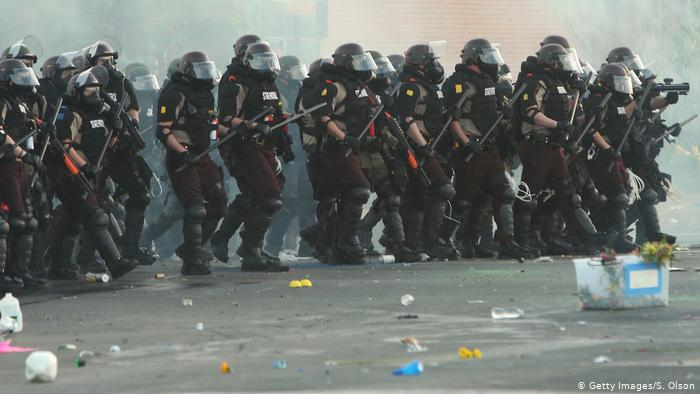

# Sumary

According to figures published by The Washington Post and The Guardian newspapers, based on data published in the local press and police records, since the beginning of 2015, the police killed more than two people a day due to misunderstandings by the agents.
The lack of official data is one of the factors that fuels the frustration of many Americans, after a series of police mistakes that have claimed several victims among members of the black community since the summer of 2014.
In the country's 50 states, different laws are in place and enforced, making statistics for the 17,000 state and local police agencies in the United States unintelligible. According to figures published on Sunday by The Washington Post, 385 people have died at the hands of the police since the beginning of 2015. This figure is much higher than official federal data.

We will analyze these data to find similarities and answer whether most of the police mistakes are attacks on black people or other ethnicities.

Let's get started!

**We import the main libraries.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**We define a function for resizing the graphs**

In [ ]:
def resizeplot():
    plt.figure(figsize=(10,6))

**Load the data**

In [ ]:
df = pd.read_csv('../input/us-police-shootings/shootings.csv')

**Let's see what goin' on**

In [ ]:
df.head()

In [ ]:
df.describe()

**I'll  visualise if there are missing data**

In [ ]:
resizeplot()
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

None, cool! Let's go on.

**The data below is very interesting. It shows us that the majority of deaths are of white people, followed by black and Hispanic people.**

Let's keep digging.

In [ ]:
df['race'].value_counts()

**Below we have the oldest people of this data killed by police and then the link to this news (if you want to check).**


https://www.post-gazette.com/local/north/2017/03/09/Elderly-man-91-fatally-shot-by-police-in-Lawrence-County-standoff/stories/201703090153

In [ ]:
df.loc[df['age'].idxmax()]

**Of this analysis, this was what shocked me the most. Young 6-year-old Jeremy killed in action. In the link below we have the article about this case.**

https://en.wikipedia.org/wiki/Shooting_of_Jeremy_Mardis

https://www.youtube.com/watch?v=PXQrLbOiviY

In [ ]:
df.loc[df['age'].idxmin()]

**Deleting the Id column that is unnecessary.**

In [ ]:
df.drop('id',axis=1,inplace=True)

**Below, we transformed some data into numeric for better visualization.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
dados = df['body_camera']

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
bc = labelencoder.fit_transform(dados)

In [ ]:
mental = df['signs_of_mental_illness']

In [ ]:
smi = labelencoder.fit_transform(mental)

**Well, here we have a good visualization of our data regarding the races according to the use of the body camera installed in their uniforms. We noticed that in most deaths the police were not using the cameras or were turned off.**

In [ ]:
resizeplot()
sns.countplot(x=df['race'],data=df,hue=bc)

**Here is a plot of how people died according to race. Most were killed by the use of firearms and then by firearms and tasers:**

In [ ]:
resizeplot()
sns.countplot(x=df['race'],data=df,hue='manner_of_death')

**Below, we have in which flight situation the victims were in, most of them were not fleeing.**

In [ ]:
resizeplot()
sns.countplot(x=df['race'],data=df,hue='flee',saturation=0.9)

**We now have a comparison between male and female victims. In this sad comparison men won.**

In [ ]:
resizeplot()
sns.countplot(x=df['gender'],data=df)

**In this boxplot, we have that the average age according to race, was approximately between 30 and 40 years.**

In [ ]:
resizeplot()
sns.boxplot(x='race',y='age',data=df,showfliers=False)

**Below is a comparison between people with signs of mental problems and those who do not.
We can see that the people who do not have these problems are the majority..**

In [ ]:
resizeplot()
sns.countplot(x=smi, data=df)

We have a top five of the black victims by state.
1. California;
2. Florida;
3. Georgia;
4. Los Angeles.


In [ ]:
df[(df['race']=='Black')]['state'].value_counts().head(5)

**From the state of California what city was more black people killed?**

In [ ]:
resizeplot()
df[(df['race']=='Black')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**White victims**
1. California;
2. Texas;
3. Florida;
4. Arizona;
5. Oklahoma.

In [ ]:
df[(df['race']=='White')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['race']=='White')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Asians:**
1. California;
2. Hawaii;
3. Washington;
4. Texas;
5. Colorado.

In [ ]:
df[(df['race']=='Asian')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['race']=='Asian')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Hispanics:**
1. California;
2. Texas;
3. Arizona;
4. New Mexico;
5. Florida.

In [ ]:
df[(df['race']=='Hispanic')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['race']=='Hispanic')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Natives:**
1. Arizona;
2. Alaska;
3. Washington;
4. Oklahoma;
5. North Dakota.

In [ ]:
df[(df['race']=='Native')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['race']=='Native')&(df['state']=='AZ')]['city'].value_counts().head(5).plot(kind='bar')

**Which state killed more women?**

In [ ]:
df[(df['gender']=='F')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['gender']=='F')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar',color='pink')

**Which state killed more men?**

In [ ]:
df[(df['gender']=='M')]['state'].value_counts().head(5)

In [ ]:
resizeplot()
df[(df['gender']=='M')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**How many children under the age of 12 died?**

In [ ]:
#Quantas crianças morreram
df[df['age']<12].count().max()

**How many teenagers over 12 and under 18 died?**

In [ ]:

df[(df['age']>12)&(df['age']<18)].count().max()

**How many adults died?**

In [ ]:
df[df['age']>=18].count().max()

**We split the dates for a better view:**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
time = df['date'].iloc[0]

In [ ]:
df['year'] = df['date'].apply(lambda time: time.year)

In [ ]:
df['month'] = df['date'].apply(lambda time: time.month)

In [ ]:
df['day_of_week'] = df['date'].apply(lambda time: time.dayofweek)

In [ ]:
mes = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
      10:'October',11:'November',12:'December'}

In [ ]:
df['month'] = df['month'].map(mes)

In [ ]:
df.drop('date',inplace=True,axis=1)

In [ ]:
df.head()

**We separate the objects in possession of the victims by year. We see a basically stable number of firearms followed by sharp objects. The data do not report for the whole of 2020, so they are incomplete.**

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x = df['year'],data = df,hue='arms_category',saturation=2.0)
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

**We have a good view of the ages over the years separated by months. As we saw earlier, ages ranged between 30 and 40 years.**

In [ ]:
pt = df.pivot_table(index='month',columns='year',values='age')

In [ ]:
resizeplot()
sns.heatmap(pt,annot=True)

# Unfortunately, these are data that occur not only in the USA 
# but in several countries around the world. We hope that these
# estimates will gradually decrease while the police authorities
# also value their own lives.That's it folks, I hope this review
# has been helpful don't forget to give an up vote. See ya!